# Introduction to Big Data Analysis - list 4
## *Wojciech Korczyński 229949*

In [79]:
from IPython import display
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_style("darkgrid")
from datetime import datetime
matplotlib.rcParams['figure.figsize'] = [8, 5]
matplotlib.rcParams.update({'font.size': 18})

from stop_words import get_stop_words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Data collection

Data were obtained using `tweets_receiving.py` and `spark_streaming.py`
- `tweets_receiving.py` sets connection with Twitter API and streams tweets via chosen host and port. In that case there are tweets containg word 'coronavirus', only in English. 
- `spark_streaming.py` settle Spark session with streaming. It gets stream of data from chosen host and port, process that data on the fly and eventually save them in .csv files.

In that case there were obtained data about hashtags, words, text of tweets with their sentiment.

# Hashtags

The file contains data about hashtags and their counts. These counts are not integretade from varoius windows in spark streaming. Thus, they are to be grouped.

In [4]:
hashtags_df = pd.read_csv("hashtags.csv", index_col=0)

In [88]:
grouped_hashtags_df = hashtags_df.groupby('tag', sort=True)['count'].sum().reset_index()
grouped_hashtags_df = grouped_hashtags_df.sort_values(by = ['count'], ascending=False)

In [59]:
top10hashtags_df = grouped_hashtags_df.nlargest(10, 'count') 
top10hashtags_df.set_index("tag",drop=True,inplace=True)
top10hashtags_df

,count
tag,
coronavirus,179
covid19,84
covidー19,11
coronavirusrt,11
poll,9
oann,7
foodsystems,6
publichealth,6
coron…rt,6


Text(0.5, 1.0, 'Top 10 hashtag')

C:\Users\wojte\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wojte\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


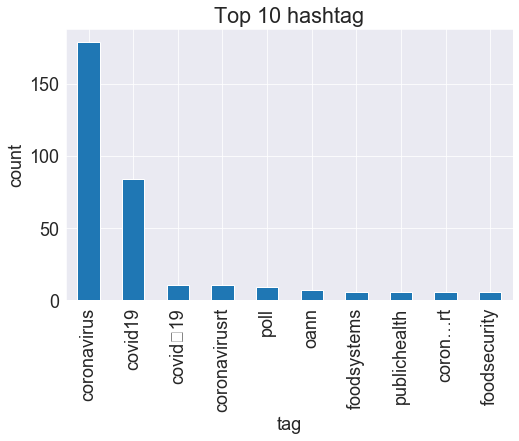

In [60]:
top10hashtags_df['count'].plot.bar()
plt.ylabel('count')
plt.title('Top 10 hashtag')

# Tweets texts

The data contains text lines and its sentiment.

In [40]:
tweets_df = pd.read_csv("tweets.csv", index_col=0)

In [41]:
tweets_df

,text,sentiment
0,RT We have just heard the number of Coronaviru...,Positive
1,Dr Francis Boyle Creator Of BioWeapons Act Say...,Negative
2,uk Hand washing still plays a key role in prot...,Positive
3,Wash your hands more often,Neutral
4,Us RT Here come the blue checkmarks 3C 3 Lets ...,Neutral
...,...,...
1137,aka this is what happens when Wall Street capt...,Negative
1138,He was first warned o RT Why would a piece of ...,Negative
1139,We ve already seen prisons are the hardes Just...,Positive
1140,US and Western allies offer disjointed respons...,Negative


## Distribution of sentiment

Text(0.5, 1.0, 'Sentiment of tweets')

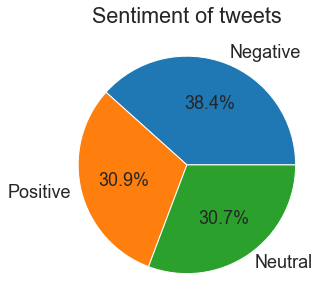

In [54]:
tweets_df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Sentiment of tweets')

## Word cloud

In [80]:
entire_text = " ".join(text for text in tweets_df['text'])
stopwords = get_stop_words('en')

In [86]:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(entire_text)

(-0.5, 399.5, 199.5, -0.5)

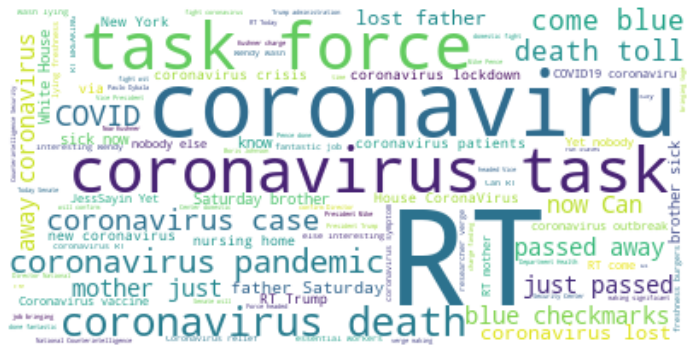

In [87]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

# Words

The file contains data about words and their counts. These counts are not integretade from varoius windows in spark streaming. Thus, they are to be grouped.

In [61]:
words_df = pd.read_csv("words.csv", index_col=0)

In [73]:
grouped_words_df = words_df.groupby('word', sort=True)['count'].sum().reset_index()
grouped_words_df = grouped_words_df.sort_values(by = ['count'], ascending=False)

top_words_num = 30
top_words_df = grouped_words_df.nlargest(top_words_num, 'count') 
top_words_df.set_index("word",drop=True,inplace=True)
top_words_df

,count
word,
coronavirus,1226
rt,1049
new,205
trump,203
death,198
state,144
covid,140
say,139
people,135


Text(0.5, 1.0, 'Top 30 words')

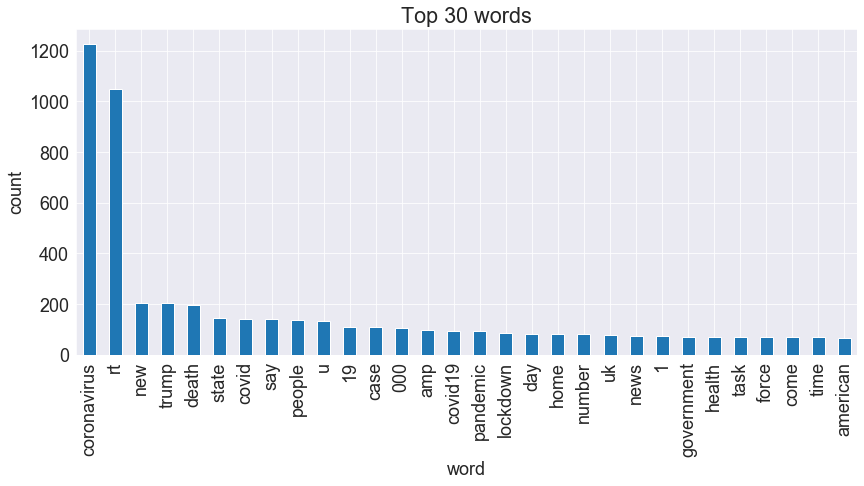

In [74]:
top_words_df['count'].plot.bar(figsize=(14, 6))
plt.ylabel('count')
plt.title('Top ' + str(top_words_num) + ' words')

### Sources
- https://towardsdatascience.com/hands-on-big-data-streaming-apache-spark-at-scale-fd89c15fa6b0
- https://github.com/nilabja9/pyspark-twitter